# Analysis of US Demographics From 2010 to 2020

In [1]:
#IMPORT THESE IMPORTANT MODULES
import matplotlib.pylab as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import utilities
%load_ext autoreload
%autoreload 2

## Reading in the Datasets and Turning Them to Dataframes

#### Income

In [2]:
infilename = "Data Sets/2000 Income Cleaned.csv"
df2000Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2000')

print('2000 Income Dataframe')
#df2000Income

2000 Income Dataframe


In [3]:
infilename = "Data Sets/2010 Income Cleaned.csv"
df2010Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2010')

print('2010 Income Dataframe')
#df2010Income

2010 Income Dataframe


In [4]:
infilename = "Data Sets/2020 Income Cleaned.csv"
df2020Income = utilities.parse_csv_file_to_dataframe(infilename, filetype='income', fileyear='2020')

print('2020 Income Dataframe')
#df2020Income

2020 Income Dataframe


#### Population and Demographics

In [5]:
infilename = "Data Sets/2000 Population Cleaned.csv"
df2000Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2000')

print('2000 Demographics Dataframe')
#df2000Demographics

2000 Demographics Dataframe


In [6]:
infilename = "Data Sets/2010 Population and Demographics Cleaned.csv"
df2010Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2010')

print('2010 Demographics Dataframe')
#df2010Demographics

2010 Demographics Dataframe


In [7]:
infilename = "Data Sets/2020 Population and Demographics Cleaned.csv"
df2020Demographics = utilities.parse_csv_file_to_dataframe(infilename, filetype='demographics', fileyear='2020')

print('2020 Demographics Dataframe')
#df2020Demographics

2020 Demographics Dataframe


#### Removing Non-States from the Dataset

In [17]:
#Drop Non-States into a Mask
mask = (df2000Income['State'] == 'District of Columbia') | (df2000Income['State'] == 'Puerto Rico')
#Reassign the dataframe to give it the same name
df2000Income = df2000Income[~mask]
#df2000Income

#Drop Non-States into a Mask
mask = (df2010Income['State'] == 'District of Columbia') | (df2010Income['State'] == 'Puerto Rico')
#Reassign the dataframe to give it the same name
df2010Income = df2010Income[~mask]
#df2010Income

#Drop Non-States into a Mask
mask = (df2020Income['State'] == 'District of Columbia') | (df2020Income['State'] == 'Puerto Rico')
#Reassign the dataframe to give it the same name
df2020Income = df2020Income[~mask]
#df2020Income

#Drop Non-States into a Mask
mask = (df2000Demographics['State'] == 'District of Columbia') | (df2000Demographics['State'] == 'Puerto Rico')
#Reassign the dataframe to give it the same name
df2000Demographics = df2000Demographics[~mask]
#df2000Demographics

#Drop Non-States into a Mask
mask = (df2010Demographics['State'] == 'District of Columbia') | (df2010Demographics['State'] == 'Puerto Rico')
#Reassign the dataframe to give it the same name
df2010Demographics = df2010Demographics[~mask]
#df2010Demographics

#Drop Non-States into a Mask
mask = (df2020Demographics['State'] == 'District of Columbia') | (df2020Demographics['State'] == 'Puerto Rico')
#Reassign the dataframe to give it the same name
df2020Demographics = df2020Demographics[~mask]
#df2020Demographics

## Graphs of Features by Year

### Making a New Dataframe With the Calculated Differences and Fractions

In [18]:
#New Dataframe with State Names Copied Over
dfnew = df2010Demographics[['State']].copy()

In [19]:
#Adding all of the calcualted values to the new Dataframe dfnew
#Total Population
a = df2010Demographics['Population']
b = df2020Demographics['Population']
c = b - a
dfnew['Population Change'] = c
dfnew['Population Change Fraction'] = c/a
#Number of Males
d = df2010Demographics['Male']
e = df2020Demographics['Male']
f = e - d
dfnew['Male Change'] = f
dfnew['Male Change Fraction'] = f/d
#Number of Females
g = df2010Demographics['Female']
h = df2020Demographics['Female']
i = h - g
dfnew['Female Change'] = i
dfnew['Female Change Fraction'] = i/g
#Median Income per Household
j = df2010Income['Median']
k = df2020Income['Median']
l = k - j
dfnew['Median Income Change'] = l
dfnew['Median Income Change Fraction'] = l/j
#Mean Income per Household
m = df2010Income['Mean']
n = df2020Income['Mean']
o = n - m
dfnew['Mean Income Change'] = o
dfnew['Mean Income Change Fraction'] = o/m
#Number of White as Only Race
p = df2010Demographics['White']
q = df2020Demographics['White']
r = q - p
dfnew['White Change'] = r
dfnew['White Change Fraction'] = r/p
#Number of Black or African American as Only Race
t = df2010Demographics['Black or African American']
u = df2020Demographics['Black or African American']
v = u - t
dfnew['Black or African American Change'] = v
dfnew['Black or African American Change Fraction'] = v/t
#Printing out a snipit of the new dataframe that was created
dfnew[0:10]

,State,Population Change,Population Change Fraction,Male Change,Male Change Fraction,Female Change,Female Change Fraction,Median Income Change,Median Income Change Fraction,Mean Income Change,Mean Income Change Fraction,White Change,White Change Fraction,Black or African American Change,Black or African American Change Fraction
0,Alabama,107888.0,0.022546,43491.0,0.018728,64397.0,0.026145,11561.0,0.285640,16186.0,0.290186,-80004.0,-0.023650,10652.0,0.008253
1,Alaska,23005.0,0.032221,12217.0,0.032803,10788.0,0.031586,13214.0,0.204627,17521.0,0.215537,-59681.0,-0.113324,-9227.0,-0.278585
2,Arizona,760327.0,0.118547,374279.0,0.117303,386048.0,0.119778,14740.0,0.315031,21542.0,0.342818,50225.0,0.009581,12185.0,0.038940
3,Arkansas,90267.0,0.030896,47674.0,0.033319,42593.0,0.028571,11168.0,0.291539,16975.0,0.324062,-66043.0,-0.028272,-22567.0,-0.046975
4,California,1996660.0,0.053459,992377.0,0.053438,1004283.0,0.053479,20964.0,0.363277,32157.0,0.404669,-2557570.0,-0.103919,-398460.0,-0.150395
5,Colorado,635855.0,0.125935,330791.0,0.130677,305064.0,0.121167,21185.0,0.391981,28510.0,0.393659,274401.0,0.062937,-12116.0,-0.048893
6,Connecticut,-6524.0,-0.001824,2770.0,0.001593,-9294.0,-0.005056,15823.0,0.247111,25263.0,0.280469,-222267.0,-0.077384,-20810.0,-0.051641
7,Delaware,67910.0,0.075475,31112.0,0.071258,36798.0,0.079450,13263.0,0.237488,19758.0,0.272336,-2272.0,-0.003469,9175.0,0.045059
9,Florida,2373598.0,0.125965,1162046.0,0.126137,1211552.0,0.125800,13294.0,0.299354,21227.0,0.343052,456372.0,0.030955,185701.0,0.058116
10,Georgia,803992.0,0.082778,371182.0,0.078263,432810.0,0.087087,14794.0,0.318630,22724.0,0.360887,-16383.0,-0.002714,248334.0,0.080851


### Creating the Graphs

#### Population

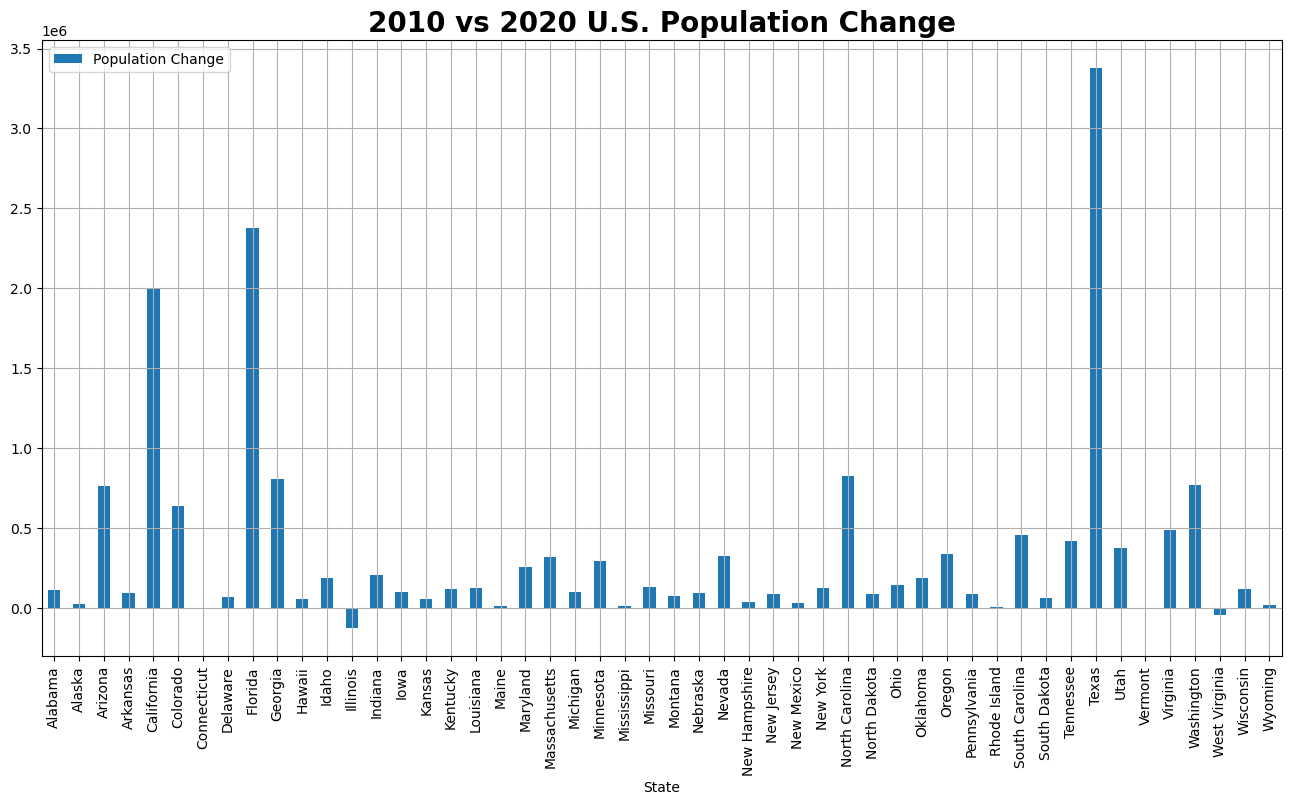

In [20]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Population Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Population Change", fontsize=20, fontweight ='bold')
#plt.ticklabel_format(style='plain')
plt.grid()

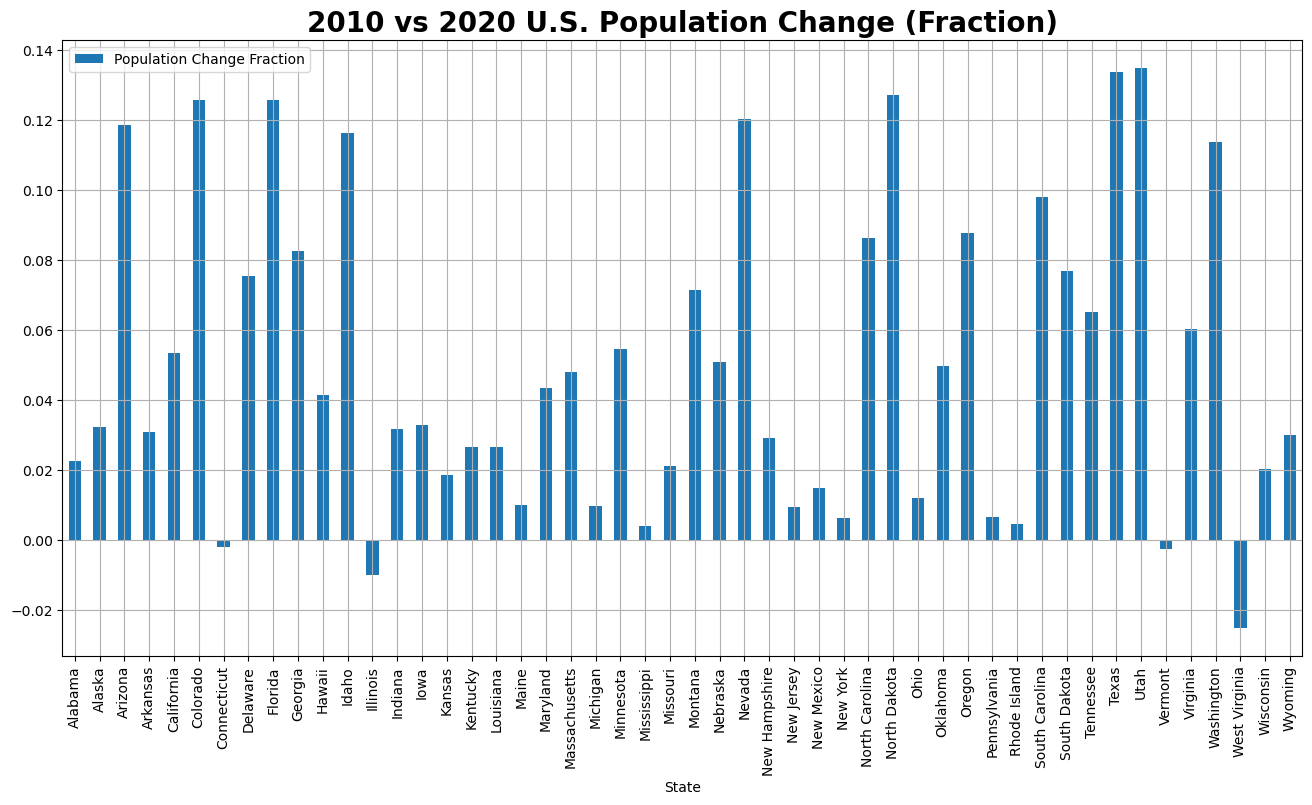

In [21]:
plt.figure(figsize=(16,8))
dfnew.plot.bar(x='State',y='Population Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Sex (Female, Male)

##### Male

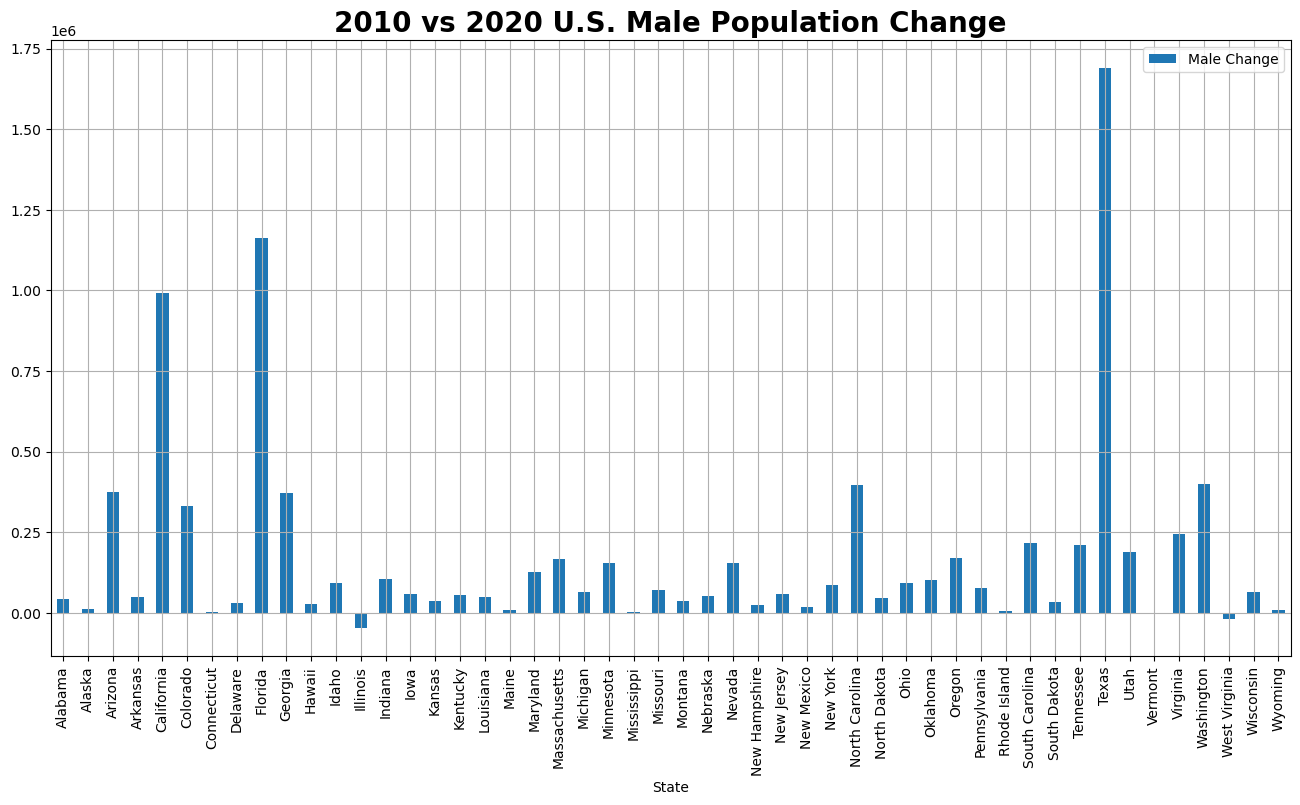

In [22]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Male Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Male Population Change", fontsize=20, fontweight ='bold')
plt.grid()

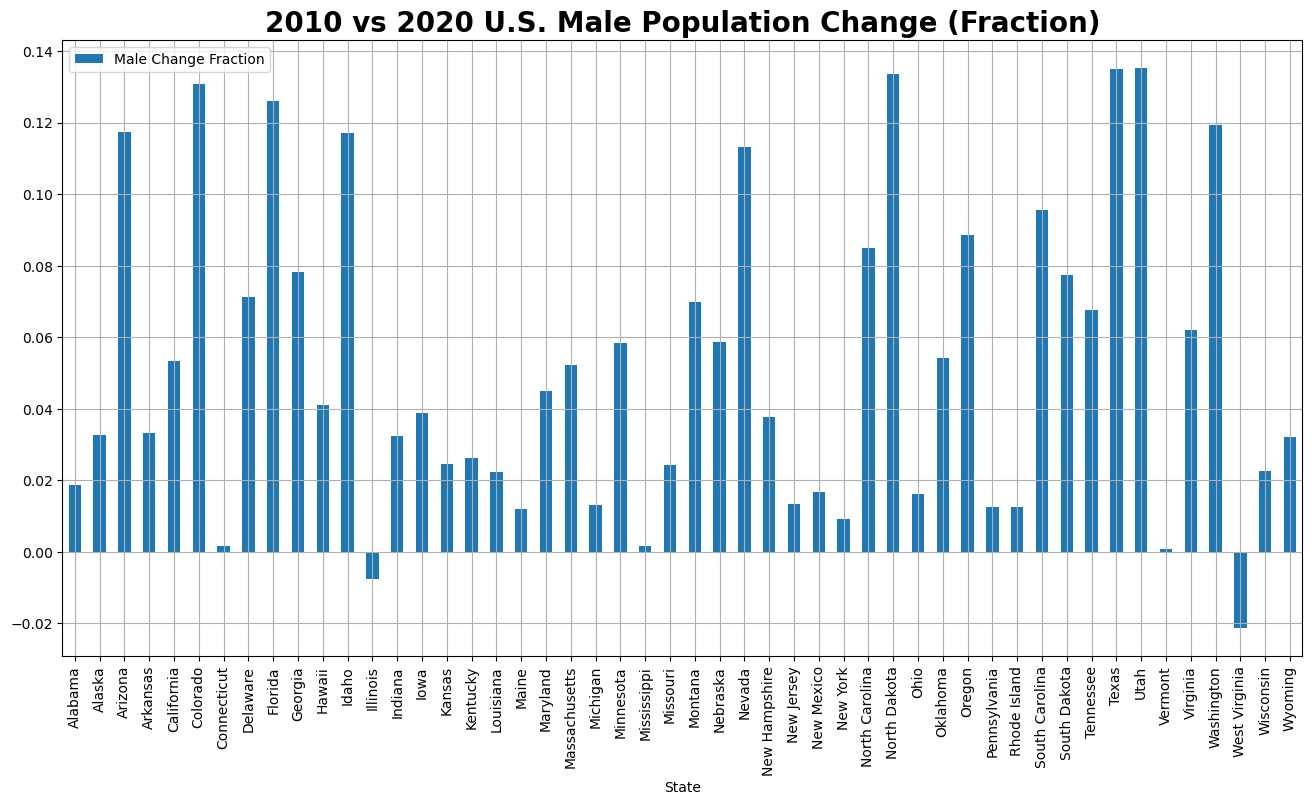

In [23]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Male Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Male Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### Female

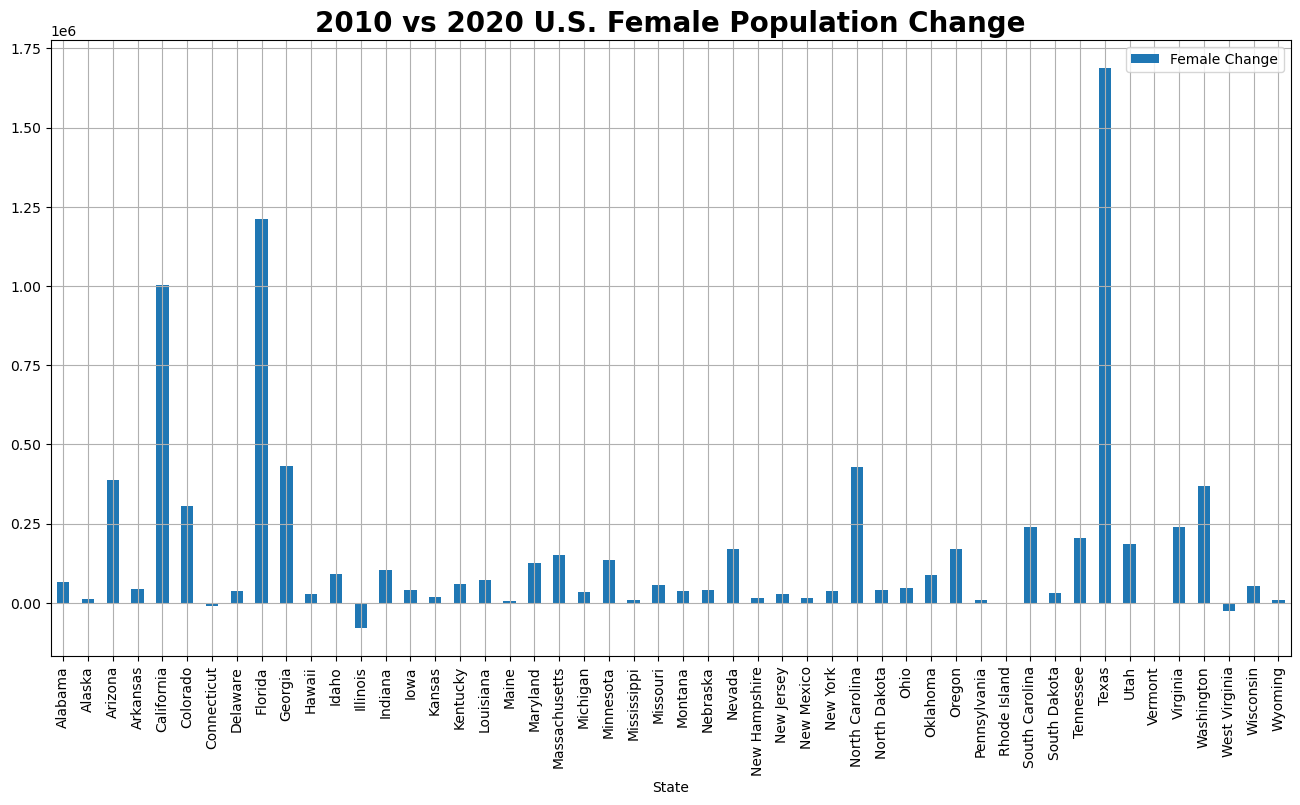

In [24]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Female Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Female Population Change", fontsize=20, fontweight ='bold')
plt.grid()

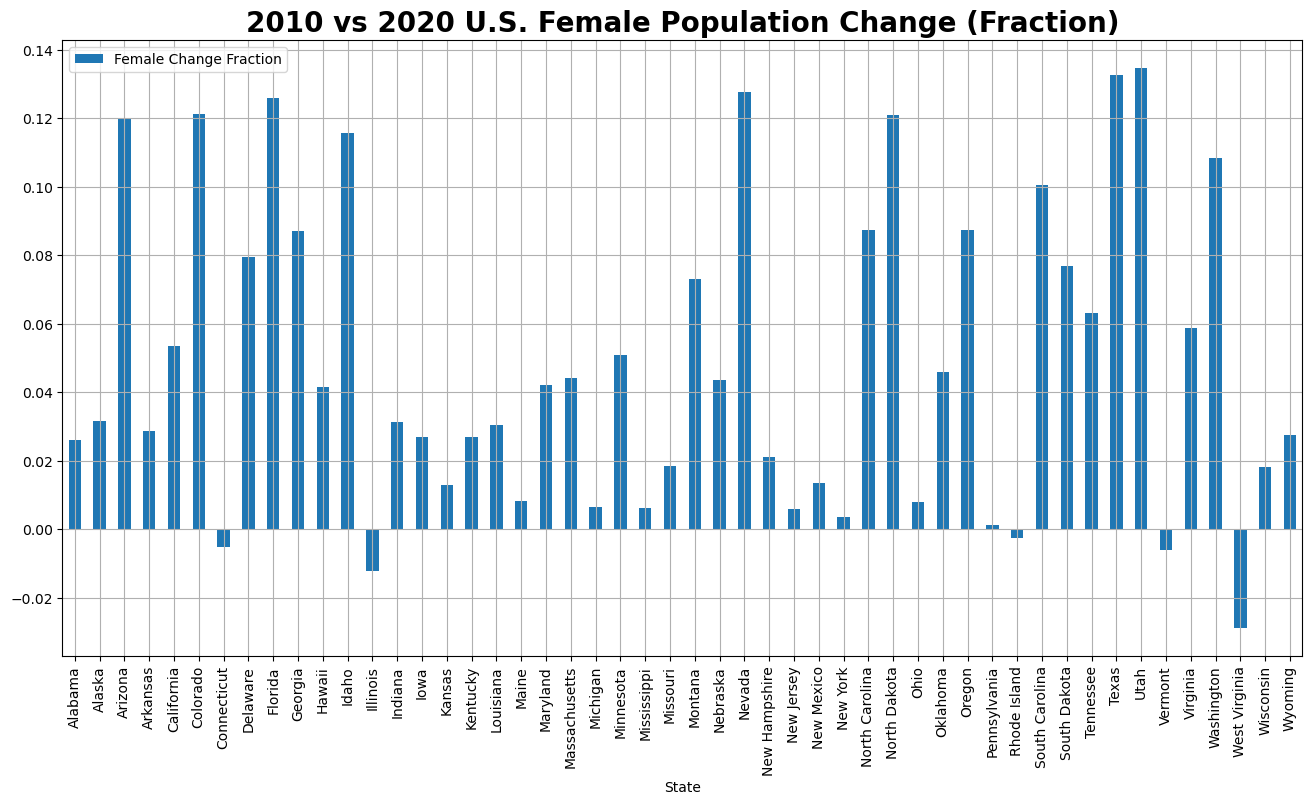

In [25]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Female Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Female Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Median Income

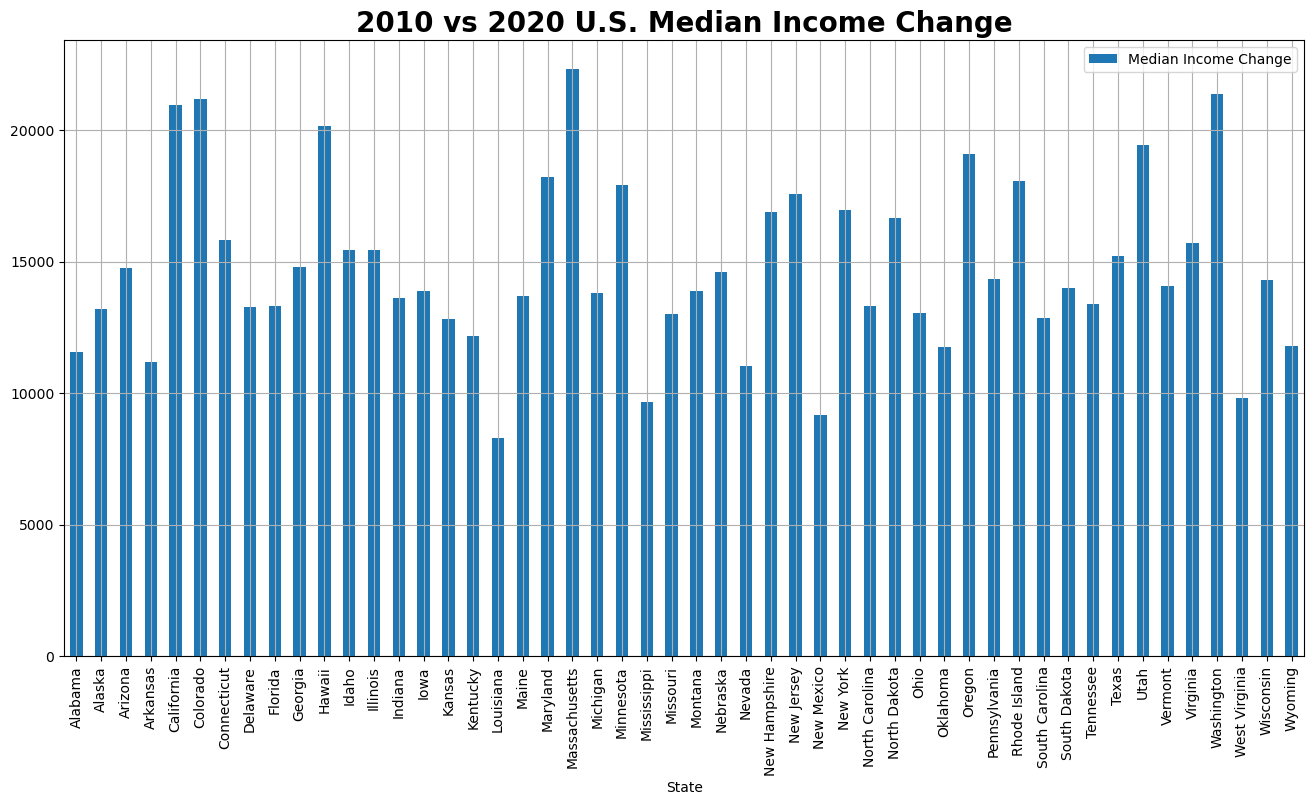

In [26]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Median Income Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Median Income Change", fontsize=20, fontweight ='bold')
plt.grid()

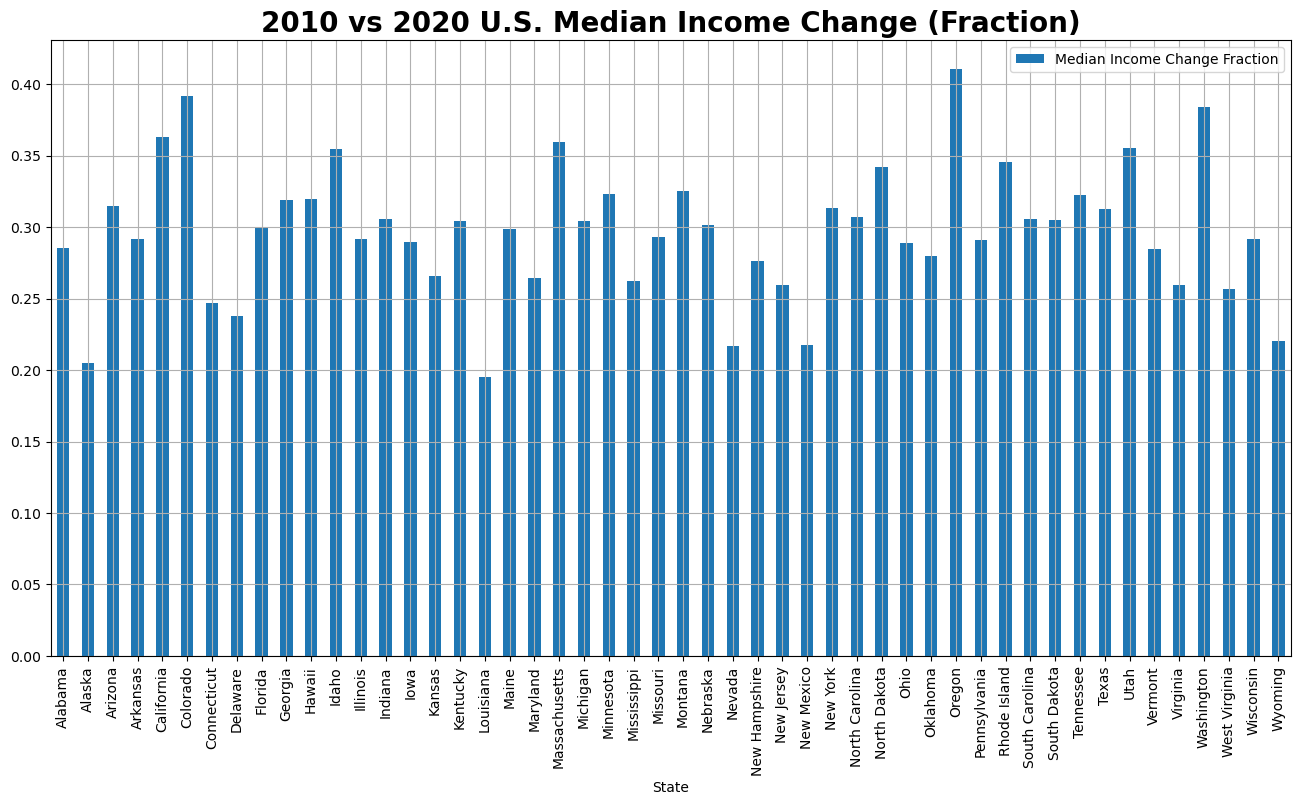

In [27]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Median Income Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Median Income Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Mean Income

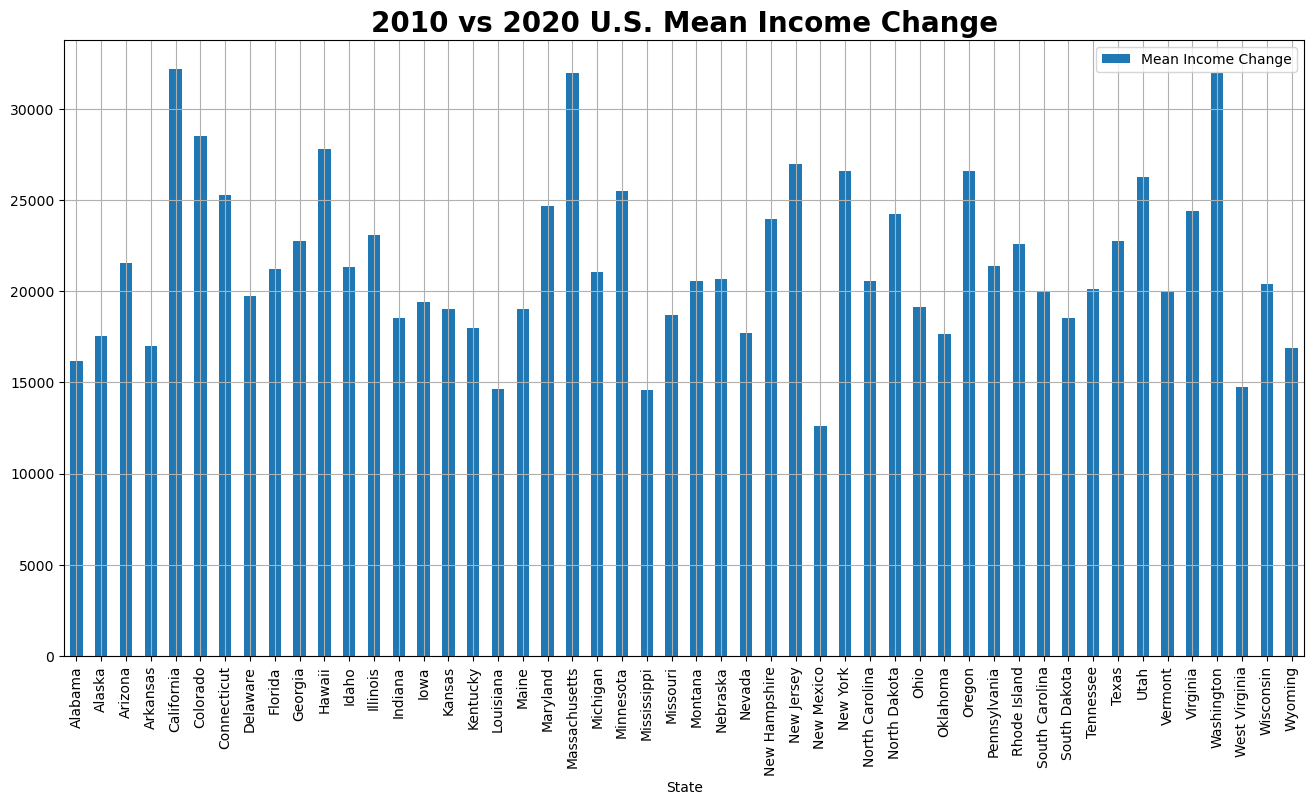

In [28]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Mean Income Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Mean Income Change", fontsize=20, fontweight ='bold')
plt.grid()

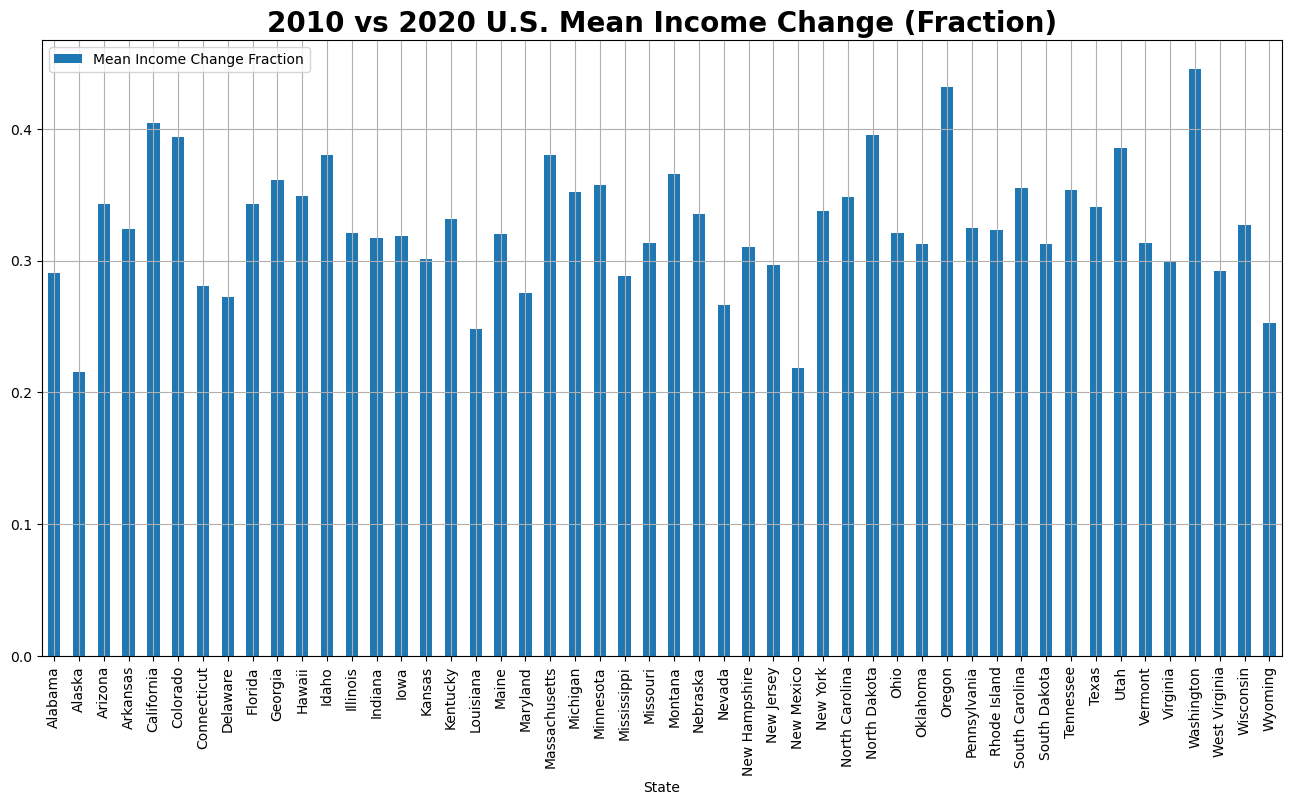

In [29]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Mean Income Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Mean Income Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

#### Racial (Black or African American, White)

##### Black or African American

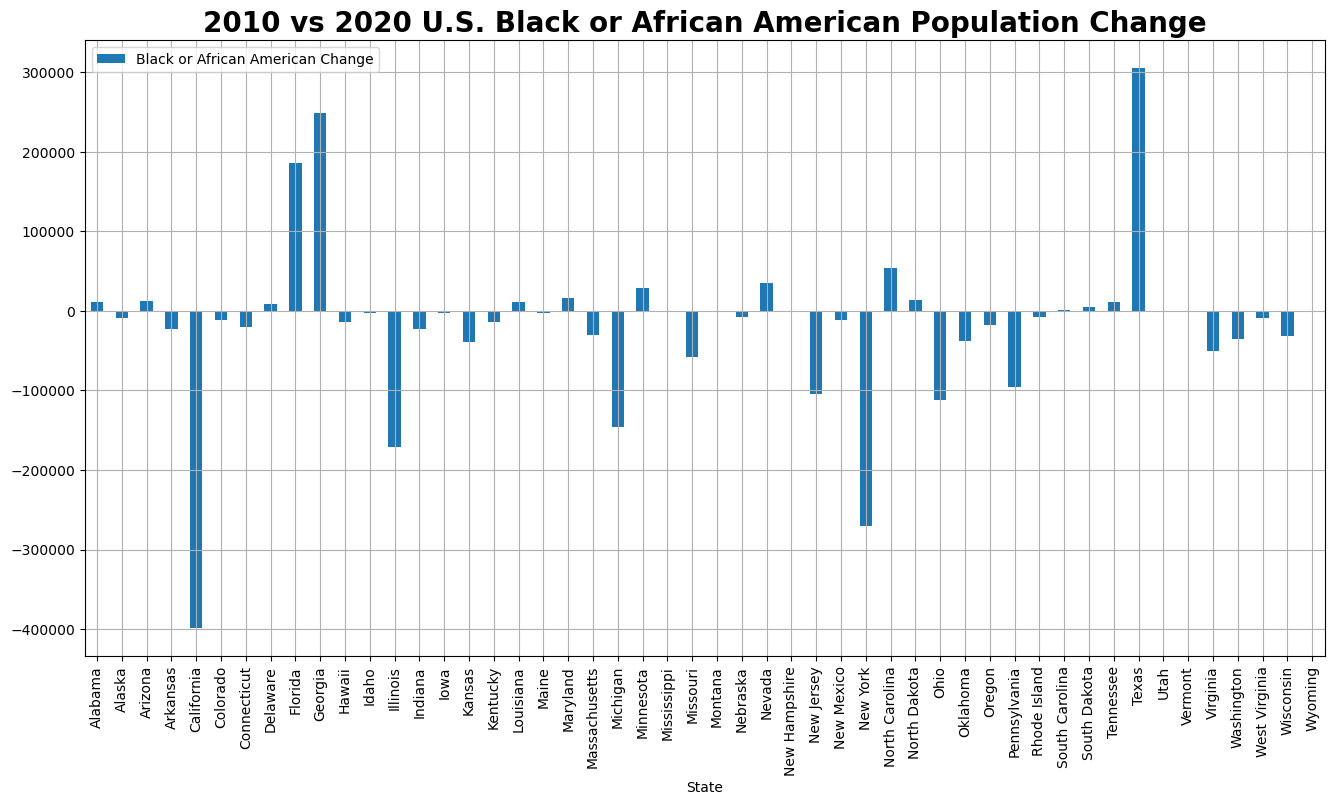

In [30]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Black or African American Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Black or African American Population Change", fontsize=20, fontweight ='bold')
plt.grid()

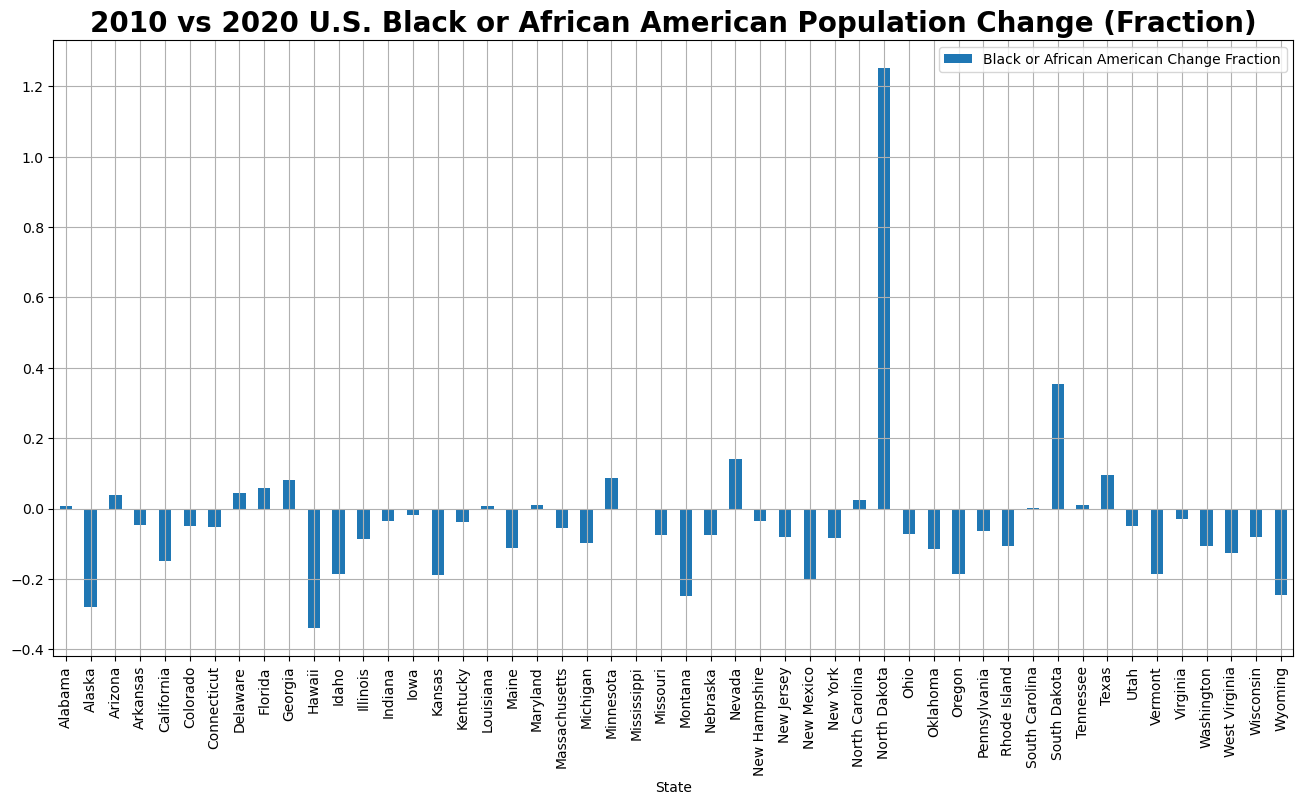

In [31]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='Black or African American Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. Black or African American Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

##### White

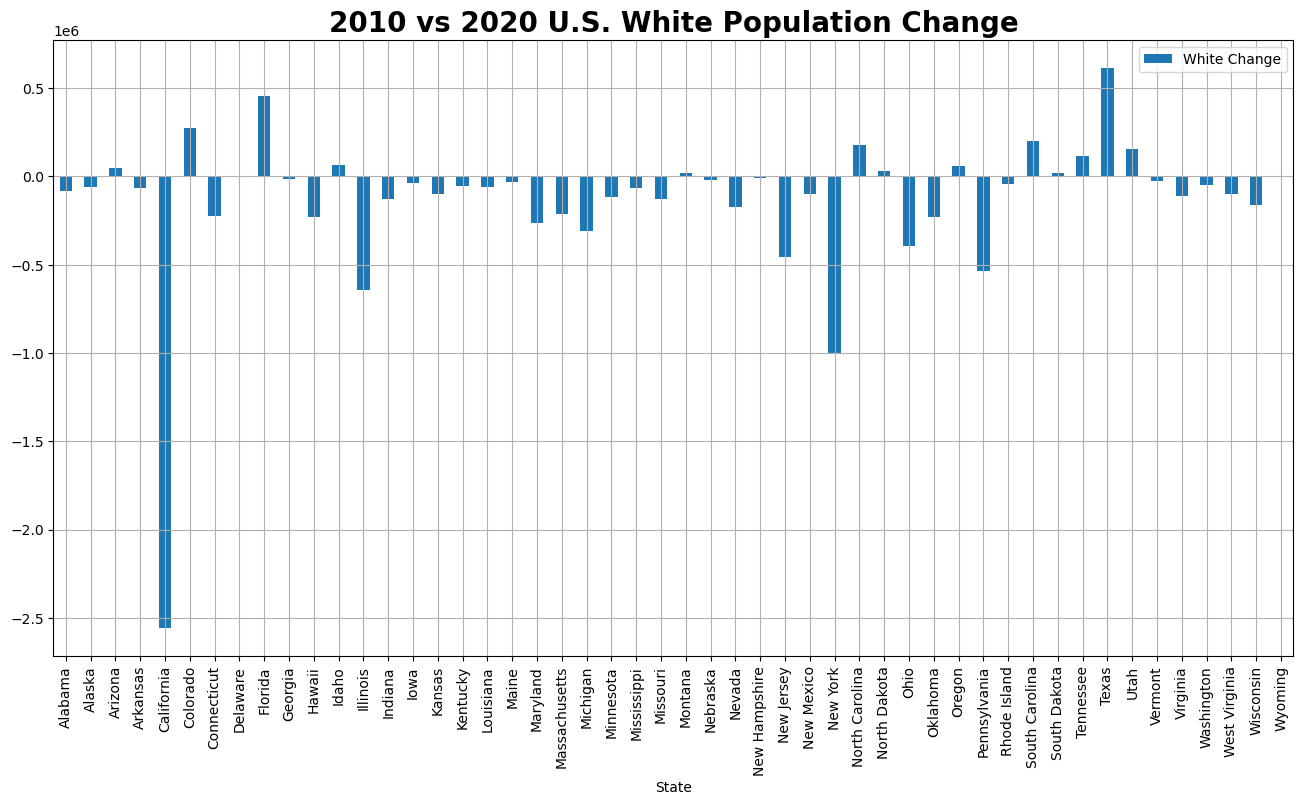

In [32]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='White Change',ax=plt.gca())
plt.title("2010 vs 2020 U.S. White Population Change", fontsize=20, fontweight ='bold')
plt.grid()

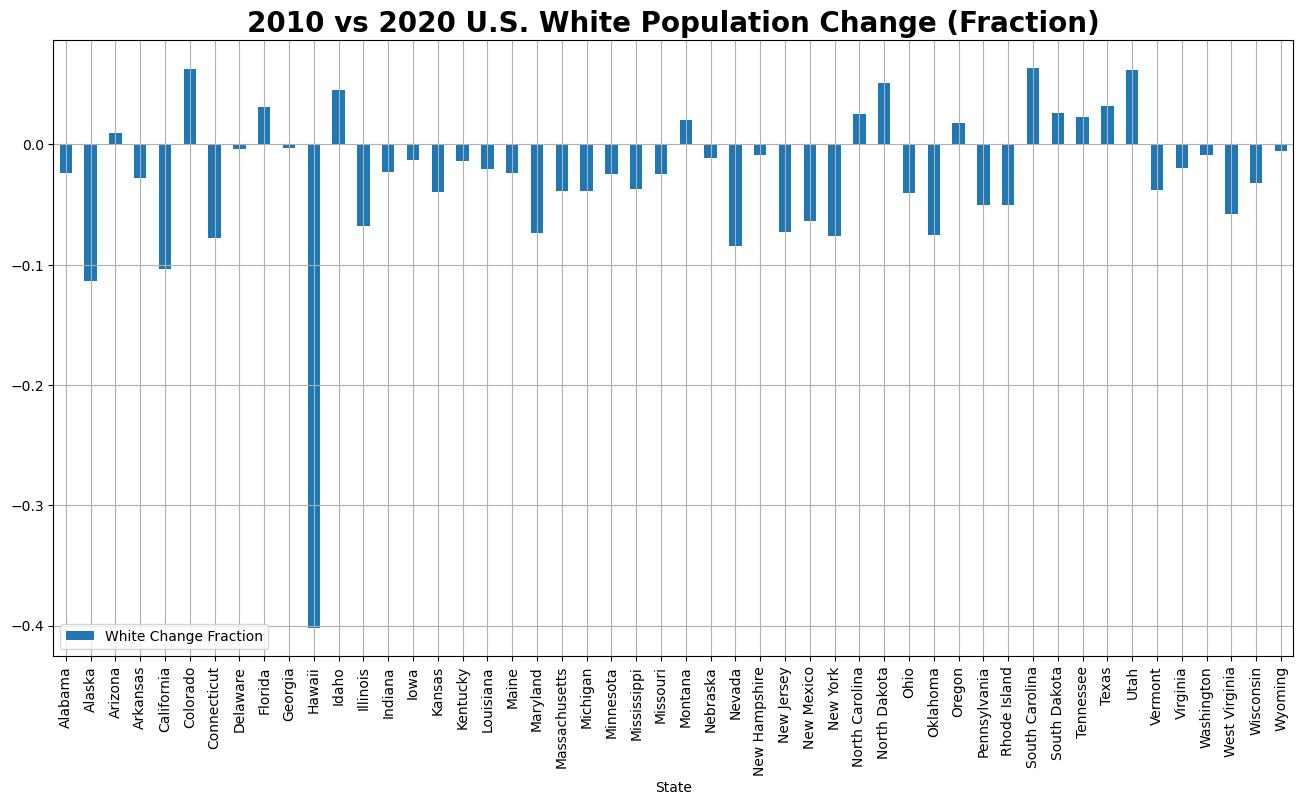

In [33]:
plt.figure(figsize=(16,8))

dfnew.plot.bar(x='State',y='White Change Fraction',ax=plt.gca())
plt.title("2010 vs 2020 U.S. White Population Change (Fraction)", fontsize=20, fontweight ='bold')
plt.grid()

## State Clustering

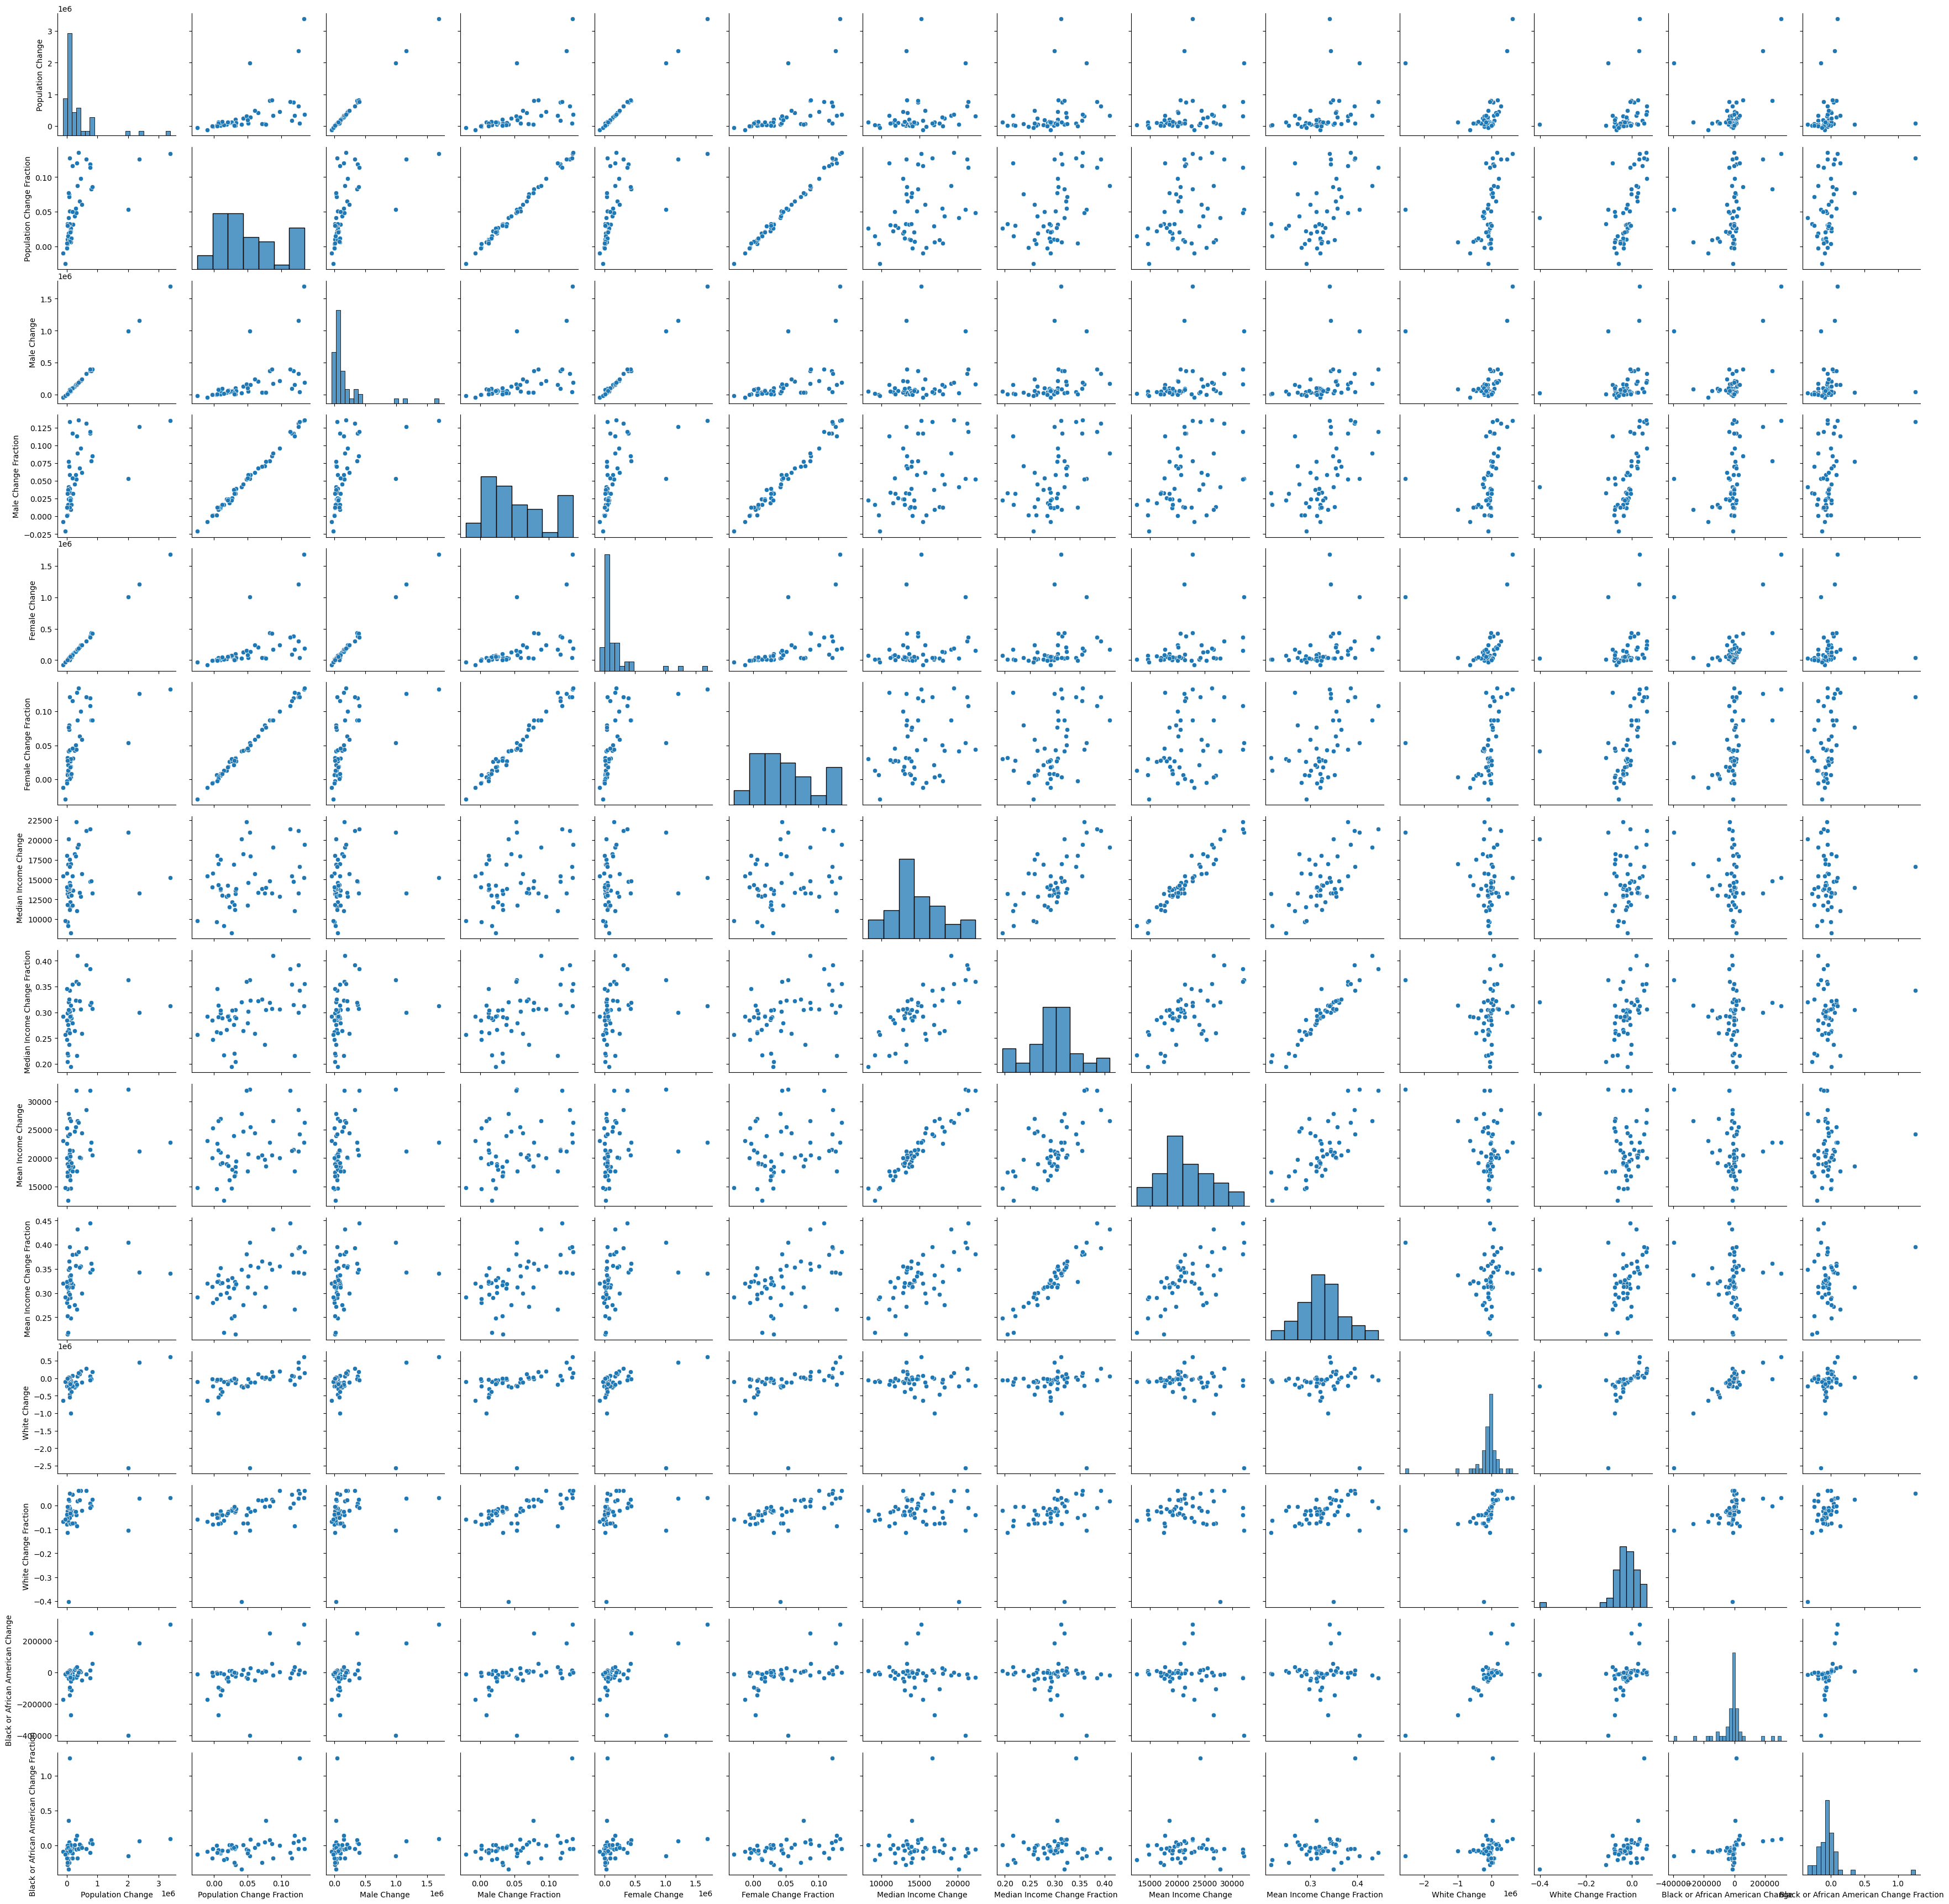

In [51]:
# We can make use of the `hue` argument to use color to distinguish the species

g = sns.PairGrid(dfnew)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [38]:
X = dfnew[['Population Change', 'Population Change Fraction', 'Male Change', 'Male Change Fraction',
           'Female Change', 'Female Change Fraction', 'Median Income Change', 'Median Income Change Fraction',
           'Mean Income Change', 'Mean Income Change Fraction', 'White Change', 'White Change Fraction',
           'Black or African American Change', 'Black or African American Change Fraction']].values
#print(X)

In [54]:
# Create the model with some number of clusters
# Choose the initial centroids at random
# Run it with 10 different centroid seeds
# Set the random seed to something deterministic (0 in this case)
model = KMeans(n_clusters=3, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km = model.fit_predict(X)

In [55]:
labels_km

array([0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [56]:
print(model.cluster_centers_)

[[ 1.99436426e+05  4.70699728e-02  1.02920191e+05  4.88951727e-02
   9.65162340e+04  4.52957869e-02  1.46646809e+04  2.95394121e-01
   2.12801277e+04  3.24577487e-01 -1.07751872e+05 -2.92636073e-02
  -1.93859362e+04 -3.61395119e-02]
 [ 2.87596300e+06  1.29861200e-01  1.42602300e+06  1.30497546e-01
   1.44994000e+06  1.29236970e-01  1.42525000e+04  3.06120352e-01
   2.19885000e+04  3.41922437e-01  5.35370000e+05  3.14838129e-02
   2.45430000e+05  7.73538005e-02]
 [ 1.99666000e+06  5.34590108e-02  9.92377000e+05  5.34383421e-02
   1.00428300e+06  5.34794501e-02  2.09640000e+04  3.63277189e-01
   3.21570000e+04  4.04668722e-01 -2.55757000e+06 -1.03918563e-01
  -3.98460000e+05 -1.50395067e-01]]


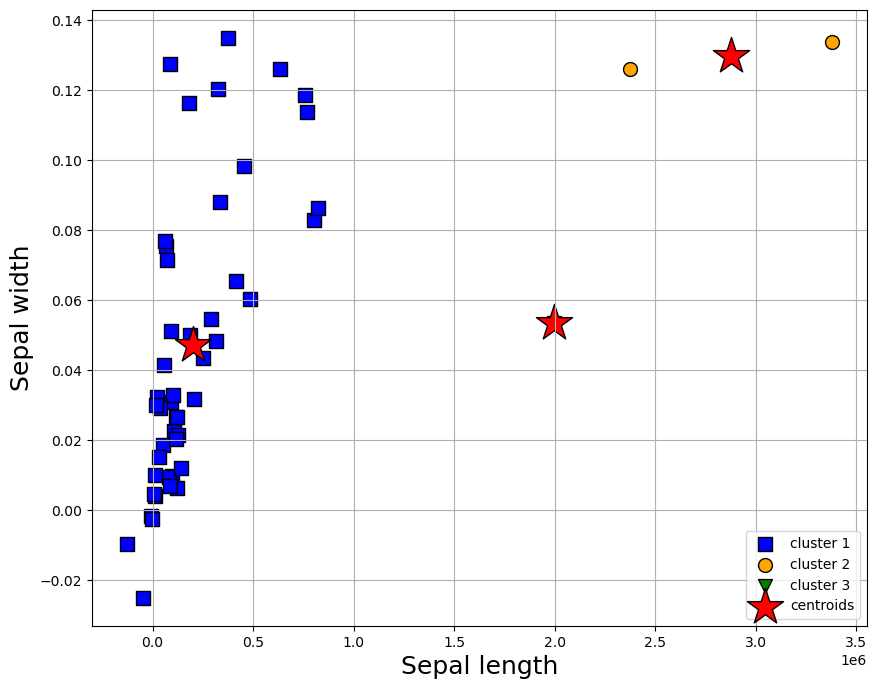

In [57]:
plt.figure(figsize=(10,8))

# Plot the 3 clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other
plt.scatter(
    X[labels_km == 0, 0], X[labels_km == 0, 1],
    s=100, c='blue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[labels_km == 1, 0], X[labels_km == 1, 1],
    s=100, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[labels_km == 2, 0], X[labels_km == 2, 1],
    s=100, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plot the centroids
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel('Sepal length',fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.legend(scatterpoints=1)
plt.grid()

col_0,0,1
State,,
Alabama,1,0
Alaska,1,0
Arizona,1,0
Arkansas,1,0
California,0,1
Colorado,1,0
Connecticut,1,0
Delaware,1,0
Florida,0,1


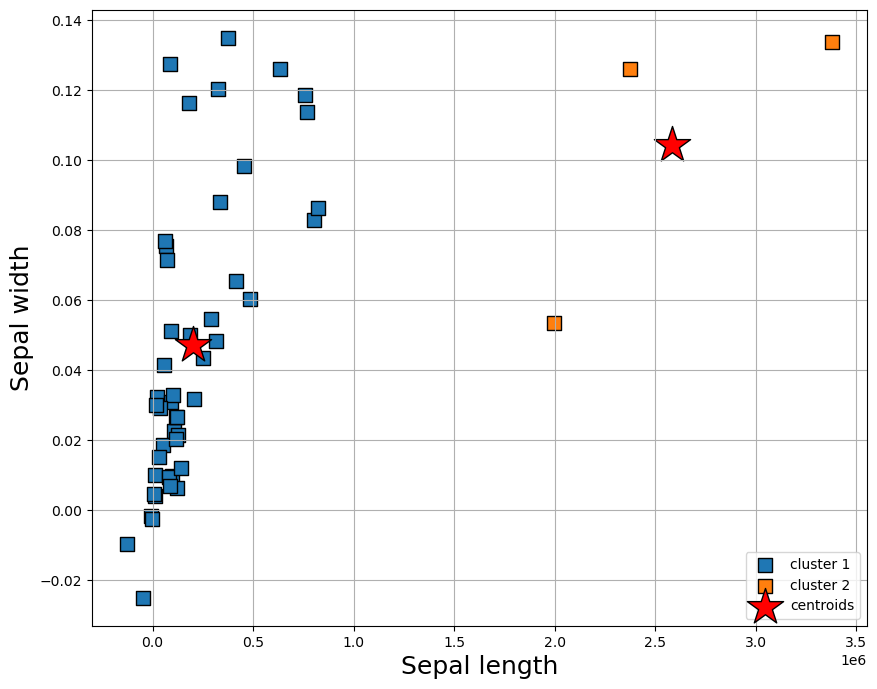

In [47]:
# Create the model with some number of clusters
# Try 2 clusters
model2 = KMeans(n_clusters=2, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km2 = model2.fit_predict(X)

plt.figure(figsize=(10,8))

# Plot the clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other

for i in range(0,2):

  plt.scatter(
      X[labels_km2 == i, 0], X[labels_km2 == i, 1],
      s=100,
      marker='s', edgecolor='black',
      label=f'cluster {i+1}'
  )


# Plot the centroids
plt.scatter(
    model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel('Sepal length',fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.legend(scatterpoints=1)
plt.grid()


pd.crosstab(dfnew['State'], labels_km2)

col_0,0,1,2,3,4,5
State,,,,,,
Alabama,0,0,0,1,0,0
Alaska,0,0,0,1,0,0
Arizona,1,0,0,0,0,0
Arkansas,0,0,0,1,0,0
California,0,1,0,0,0,0
Colorado,1,0,0,0,0,0
Connecticut,0,0,0,1,0,0
Delaware,0,0,0,1,0,0
Florida,0,0,0,0,0,1


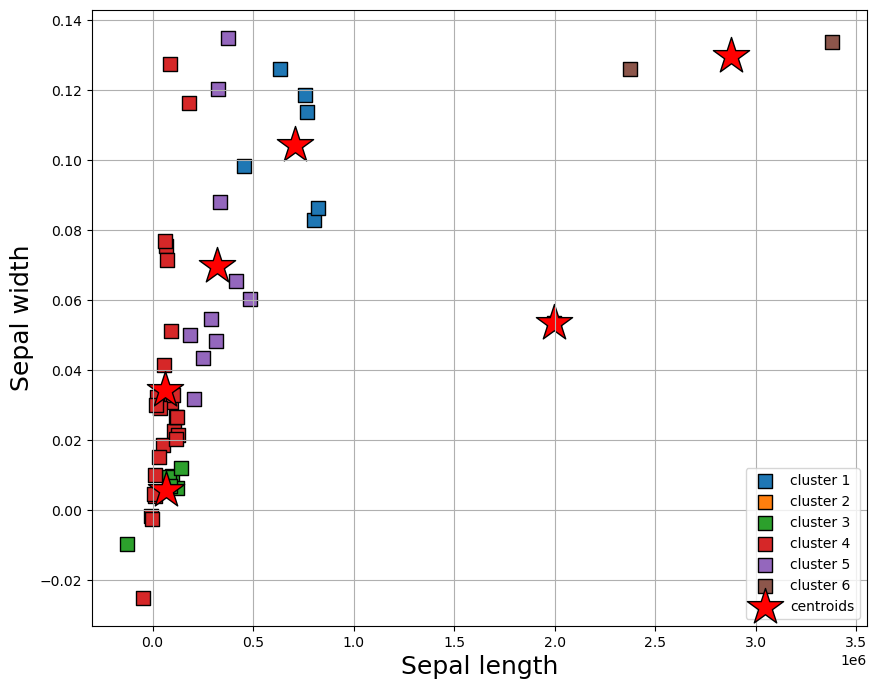

In [48]:
# Create the model with some number of clusters
# Try 6 clusters
model3 = KMeans(n_clusters=6, init='random', n_init=10, random_state=0)

# Run the clustering algorithm! 
labels_km3 = model3.fit_predict(X)

plt.figure(figsize=(10,8))

# Plot the clusters, making use of masking to display the first
# two features (the 0th and 1st column), plotted versus each other

for i in range(0,6):
  plt.scatter(
      X[labels_km3 == i, 0], X[labels_km3 == i, 1],
      s=100,
      marker='s', edgecolor='black',
      label=f'cluster {i+1}'
  )

# Plot the centroids
plt.scatter(
    model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1],
    s=750, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel('Sepal length',fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.legend(scatterpoints=1)
plt.grid()


pd.crosstab(dfnew['State'], labels_km3)

In [49]:
print(model.inertia_)
print(model2.inertia_)
print(model3.inertia_)

7120980484626.661
14548216084025.723
2020804426813.468


C:\Users\blake\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

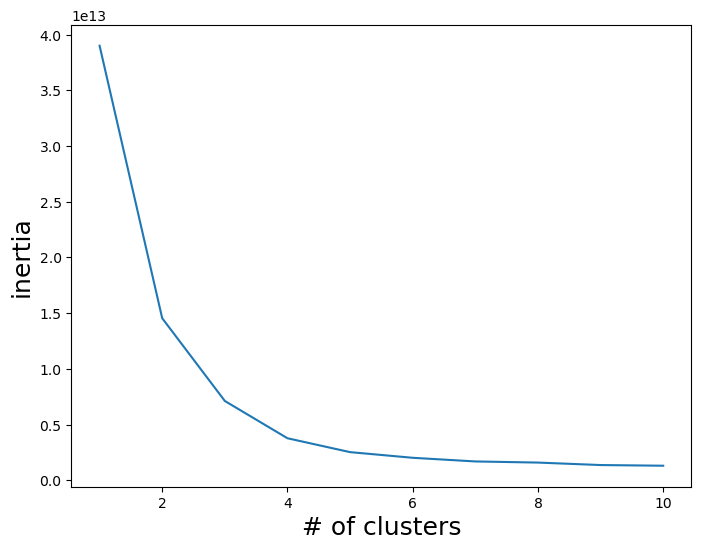

In [50]:
inertias = []
nclusters = []

# Try from 1 to 10 clusters
for i in range(1,11):
  model_temp = KMeans(n_clusters=i, init='random', n_init=10, random_state=0)
  model_temp.fit(X)

  nclusters.append(i)
  inertias.append(model_temp.inertia_)

plt.figure(figsize=(8,6))
plt.plot(nclusters, inertias)
plt.xlabel('# of clusters', fontsize=18)
plt.ylabel('inertia', fontsize=18)